# CMS hospital data download

In this notebook, we will automate the process of downloading and unzipping the current hospital data from [Centers for Medicare & Medicaid Services Data](data.cms.gov).

## Step 1 - Verifying the installation of and loading `requests`

In [1]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.


### Step 2 - Identify the url download pattern and generate prospective url string.

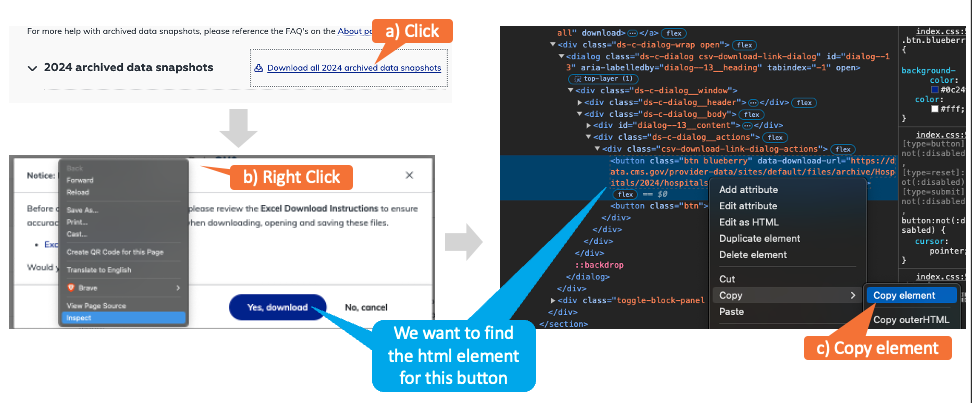

<font color="orange">
    copy 2024 element here
</font>

In [13]:
url_24 = "https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2024/hospitals_2024.zip"
url_23 = "https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2023/hospitals_2023.zip"
url_17 = "https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2017/hospitals_archive_2017.zip"

In [14]:
url_24

'https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2024/hospitals_2024.zip'

<font color="orange">
    copy 2023 element here
</font>

In [38]:
# Use a comprehension and `range` to generate some perspective urls.
# Make the output a list of tuples of the form (year, url)
urls_new = [(year, f"https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/{year}/hospitals_{year}.zip") for year in range(2021, 2025)]
urls_old = [(year, f"https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/{year}/hospitals_archieve_{year}.zip") for year in range(2017, 2021)]
urls = urls_new+urls_old
urls

[(2021,
  'https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2021/hospitals_2021.zip'),
 (2022,
  'https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2022/hospitals_2022.zip'),
 (2023,
  'https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2023/hospitals_2023.zip'),
 (2024,
  'https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2024/hospitals_2024.zip'),
 (2017,
  'https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2017/hospitals_archieve_2017.zip'),
 (2018,
  'https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2018/hospitals_archieve_2018.zip'),
 (2019,
  'https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2019/hospitals_archieve_2019.zip'),
 (2020,
  'https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2020/hospitals_archieve_2020.zip')]

### Step 3 - Figure out how to download and unzip a file

See [this Stack Overflow question](https://stackoverflow.com/questions/9419162/download-returned-zip-file-from-url)

In [39]:
# Test code here -- Try it for 2024
import requests, zipfile,io
r = requests.get(urls)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("./Data")

InvalidSchema: No connection adapters were found for "[(2021, 'https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2021/hospitals_2021.zip'), (2022, 'https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2022/hospitals_2022.zip'), (2023, 'https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2023/hospitals_2023.zip'), (2024, 'https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2024/hospitals_2024.zip'), (2017, 'https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2017/hospitals_archieve_2017.zip'), (2018, 'https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2018/hospitals_archieve_2018.zip'), (2019, 'https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2019/hospitals_archieve_2019.zip'), (2020, 'https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/2020/hospitals_archieve_2020.zip')]"

### Step 4 - Use a `for` loop (GASP!) and `try`/`except` block to process all perspective urls.

**Question.** Why break our **no for loops ever!** rule here?
**Answer 1.** This code is side-effecting, which is a good reason to use a regular loop.
**Answer 2.** We want to use a `try`/`except` statement to capture any issues with the side-effect (download and/or unzip).

**Basic "shape" of the loop**.

```{Python}
for year, url in urls
    try:
        ...
        print(f"Successfully downloaded and unzipped {year}")
    except:
        print(f"Problem downloaded and unzipped {year}")
```

In [ ]:
# Your code here

#### Step 5 - Fix the problem(s).

Now adjust your code to deal with any issues you encountered.

In [38]:
# Your fixed code here.